In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv('data/train_users_2.csv')
train.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [3]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

                         id
country_destination        
AU                      539
CA                     1428
DE                     1061
ES                     2249
FR                     5023
GB                     2324
IT                     2835
NDF                  124543
NL                      762
PT                      217
US                    62376
other                 10094


<AxesSubplot:xlabel='country_destination'>

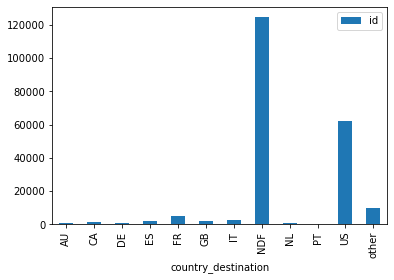

In [8]:
num_per_category = train.loc[:,('id', 'country_destination')]
num_per_category = num_per_category.groupby(['country_destination']).count()
print(num_per_category)
num_per_category.plot(kind='bar')

In [20]:
mf_split = train.loc[:, ('gender', 'country_destination')]
male = mf_split.loc[mf_split['gender'] == 'MALE']
female = mf_split.loc[mf_split['gender'] == 'FEMALE']
unknown = mf_split.loc[mf_split['gender'] == '-unknown-'] 
male = male.groupby(['country_destination']).count()
female = female.groupby(['country_destination']).count()
unknown = unknown.groupby(['country_destination']).count()
print(male)
print(female)
print(unknown)

                     gender
country_destination        
AU                      188
CA                      477
DE                      416
ES                      677
FR                     1335
GB                      682
IT                      699
NDF                   26719
NL                      278
PT                       69
US                    19457
other                  3443
                     gender
country_destination        
AU                      207
CA                      455
DE                      358
ES                      853
FR                     1962
GB                      881
IT                     1091
NDF                   31048
NL                      254
PT                       78
US                    22694
other                  3160
                     gender
country_destination        
AU                      143
CA                      491
DE                      284
ES                      715
FR                     1713
GB                  

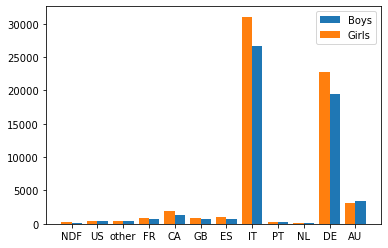

In [21]:
X_axis = np.arange(len(mf_split['country_destination'].unique()))
plt.bar(X_axis + 0.2, male.values.ravel(), 0.4, label = 'Boys')
plt.bar(X_axis - 0.2, female.values.ravel(), 0.4, label = 'Girls')

plt.xticks(X_axis,mf_split['country_destination'].unique())
plt.legend()
plt.show()

12


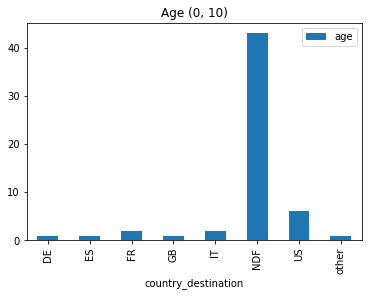

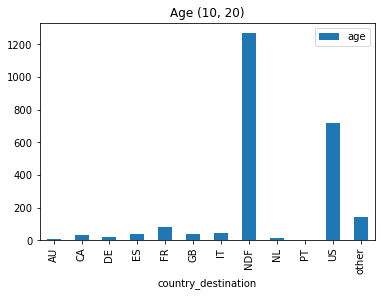

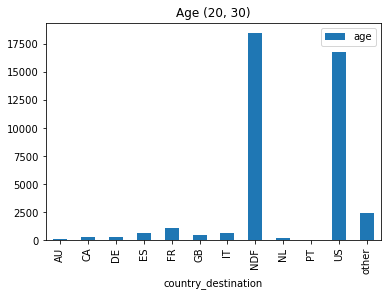

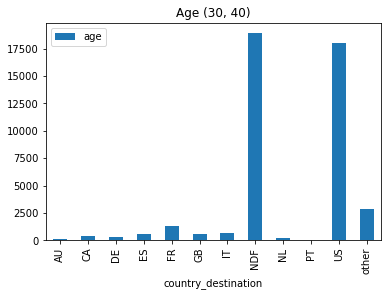

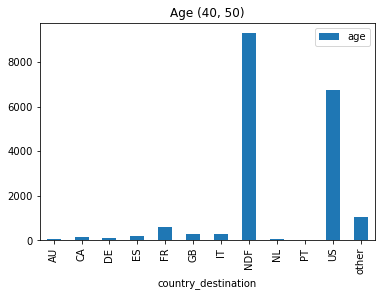

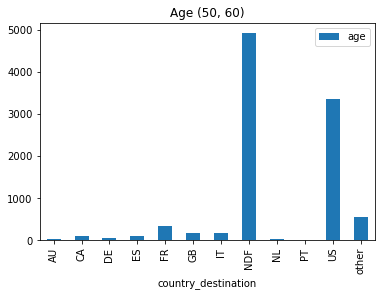

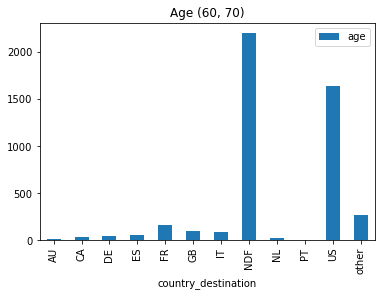

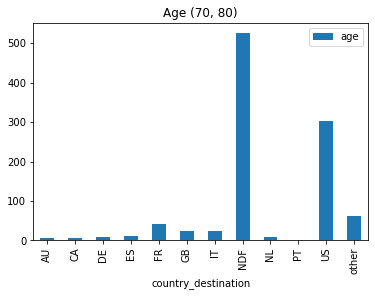

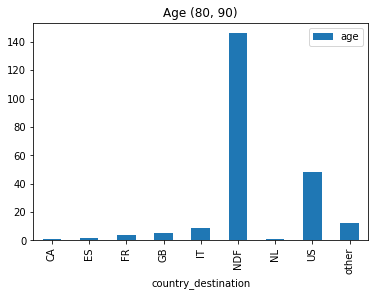

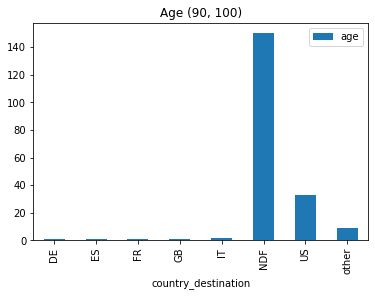

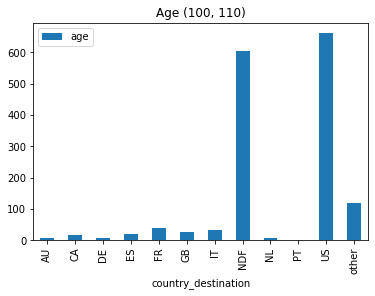

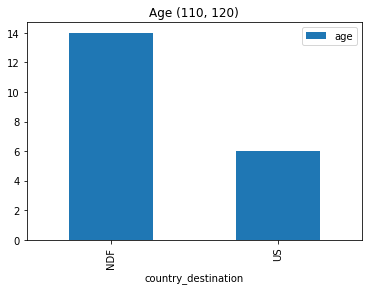

In [42]:
age_per_cat = train.loc[:,('age', 'country_destination')]
age_per_cat.dropna(inplace=True)
buckets = [(x, x+10) for x in range(0,120, 10)]
print(len(buckets))
dic = {}
for age in buckets:
    dic[age] = age_per_cat.loc[(age_per_cat['age'] > age[0]) & (age_per_cat['age'] <= age[1])]
    dic[age] = dic[age].groupby('country_destination').count()

for df in dic.items():
    df[1].plot(kind='bar', title=f'Age {df[0]}')

        